# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [84]:
x = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [85]:
def batch_gradient_descent(X, y, batch_size, lr=0.01, max_iter=1000, eps=1e-6, verbose=False):
    if batch_size > len(X) or batch_size <= 0:
        raise ValueError('Incorrect batch size')
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.random.randn(X.shape[1])
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        indices = np.arange(m)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        X_batch = X[:batch_size]
        y_batch = y[:batch_size]
        predictions = X_batch.dot(theta)
        gradient = (1 / len(y_batch)) * X_batch.T.dot(predictions - y_batch)
        new_theta = theta - lr * gradient
        if np.isnan(new_theta).any():
            raise ValueError(f"Ошибка на итерации: {iterations}. Попробуйте уменьшить значение learning rate")
        if np.linalg.norm(new_theta - theta) < eps:
            return theta, iterations
        theta = new_theta
        if verbose:
            print(f"itaration: {iterations} theta: {theta}, mse: {mean_squared_error(y_batch, predictions)}")

    return theta, iterations


def default_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6, verbose=False):
    return batch_gradient_descent(X, y, len(X), lr, max_iter, eps, verbose)


def stochastic_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6, verbose=False):
    return batch_gradient_descent(X, y, 1, lr, max_iter, eps, verbose)

In [86]:
def get_prediction(theta, x):
    return theta[1] * x + theta[0]

In [93]:
X = np.c_[np.ones(x.shape[0]), x]
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса, найденные нормальным уравнением:", theta_normal)
theta, iterations = default_gradient_descent(x, y, lr=0.01, max_iter=100, eps=1e-6, verbose=True)
print("Веса, найденные градиентным спуском:", theta)

Веса, найденные нормальным уравнением: [-0.42857143  0.92857143]
itaration: 1 theta: [-1.2257012 -0.5819017], mse: 50.47004049655357
itaration: 2 theta: [-1.1673808  -0.36400411], mse: 37.776024009069964
itaration: 3 theta: [-1.11690686 -0.1756509 ], mse: 28.289423928766883
itaration: 4 theta: [-1.07321609 -0.01283822], mse: 21.19981506123005
itaration: 5 theta: [-1.03538932  0.12789515], mse: 15.901544193665579
itaration: 6 theta: [-1.00263194  0.24954141], mse: 11.941989891416524
itaration: 7 theta: [-0.974257    0.35468723], mse: 8.982895609663194
itaration: 8 theta: [-0.94967067  0.44556875], mse: 6.771472855951998
itaration: 9 theta: [-0.92835959  0.52411906], mse: 5.118805782533975
itaration: 10 theta: [-0.90987996  0.5920093 ], mse: 3.88371233959546
itaration: 11 theta: [-0.89384814  0.65068412], mse: 2.9606832676991064
itaration: 12 theta: [-0.87993246  0.7013924 ], mse: 2.270868572504367
itaration: 13 theta: [-0.86784621  0.74521378], mse: 1.7553414674715186
itaration: 14 thet

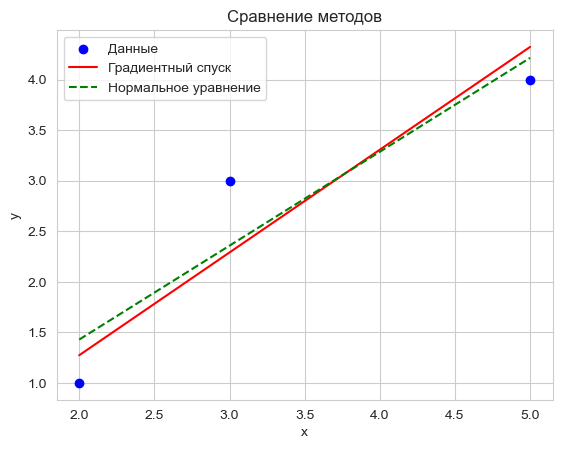

In [94]:
plt.scatter(x, y, color='blue', label='Данные')
y_pred_gd = get_prediction(theta, x)
plt.plot(x, y_pred_gd, color='red', label='Градиентный спуск')
y_pred_ne = X.dot(theta_normal)
plt.plot(x, y_pred_ne, color='green', linestyle='--', label='Нормальное уравнение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение методов')
plt.show()


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [89]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')
X_train = data_train[:, 0]
print(len(X_train))
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]

21


In [90]:

print(f"gradient type: default")
for i in [0.5, 1.0, 2.0]:
    print(f"learning rate: {i}")
    theta, iterations = default_gradient_descent(X_train, y_train, lr=i)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    y_train_pred = get_prediction(theta, X_train)
    y_test_pred = get_prediction(theta, X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"MSE TRAIN: {mse_train}, MSE TEST: {mse_test}")


gradient type: default
learning rate: 0.5
TRAIN: theta = [4.43322375 2.27915039] iterations = 196
MSE TRAIN: 0.2968966332965016, MSE TEST: 0.4351195340741197
learning rate: 1.0
TRAIN: theta = [4.43323417 2.27912725] iterations = 87
MSE TRAIN: 0.2968966332695971, MSE TEST: 0.43512050452702344
learning rate: 2.0
TRAIN: theta = [-2.12360948e+134 -9.56419513e+133] iterations = 1000
MSE TRAIN: 6.401670030024759e+268, MSE TEST: 6.445272554940472e+268


**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [96]:
print(f"gradient type: batch")
for i in [0.05, 0.1, 0.5]:
    print(f"learning rate: {i}")
    theta, iterations = stochastic_gradient_descent(X_train, y_train, lr=i, max_iter=100_000)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    y_train_pred = get_prediction(theta, X_train)
    y_test_pred = get_prediction(theta, X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"MSE TRAIN: {mse_train}, MSE TEST: {mse_test}")

gradient type: batch
learning rate: 0.05
TRAIN: theta = [4.46229197 2.25466742] iterations = 44784
MSE TRAIN: 0.2973471496932651, MSE TEST: 0.44368138480465874
learning rate: 0.1
TRAIN: theta = [4.59586932 2.33981682] iterations = 44632
MSE TRAIN: 0.3323185526727756, MSE TEST: 0.5424712018892488
learning rate: 0.5
TRAIN: theta = [4.56916433 2.48266152] iterations = 894
MSE TRAIN: 0.3496030182451384, MSE TEST: 0.570282103312617


**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [92]:
print(f"gradient type: batch")
for i in [0.5, 1.0, 2.0]:
    print(f"learning rate: {i}")
    theta, iterations = batch_gradient_descent(X_train, y_train, 3, lr=i, max_iter=1000, eps=1e-2)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    y_train_pred = get_prediction(theta, X_train)
    y_test_pred = get_prediction(theta, X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"MSE TRAIN: {mse_train}, MSE TEST: {mse_test}")

gradient type: batch
learning rate: 0.5
TRAIN: theta = [4.49499402 2.21282975] iterations = 320
MSE TRAIN: 0.29871889047734773, MSE TEST: 0.4524088902480206
learning rate: 1.0
TRAIN: theta = [4.40001918 2.30512887] iterations = 245
MSE TRAIN: 0.2975063043091733, MSE TEST: 0.4262615808767562
learning rate: 2.0
TRAIN: theta = [-1.31730563e+107 -1.23640032e+107] iterations = 1000
MSE TRAIN: 3.484644053971518e+214, MSE TEST: 3.557511407960915e+214
